### Introduktion / Problemlösmning
    - Vad är det som ska lösas
    - Vilka förklarings och responsvaribaler väl - motivera varför
    - Beskriv vilka delar av teorin som är relevanta för rapporten
    - Skriv ner relevanta formler och definitioner
### Data-analys (EDA)
    - Beskriv vilka samband som finns i datamängden. Lyft bara fram dem som används i slutändan.
    - Övrig info behöver inte någon mer utförlig analys i en sån här kortare rapport
### Modell
    - Beskriv algoritmer/modell du använt samt vilka hyper-parametrar du använt. 
    - Nämn alla modeller som avänds, beskriv bara i detalj den som faktiskt använts. Beskriv och dokumentera val. 
### Resultat
    - Utvärdera modellen
    - Jämför modeller tex i tabell. I löptext beskriv bara den modell som använts.
    - Se till att beskriva både i ord och figur eller output.
### Diskussion
    - Förklara tillkortakommanden varför blev det bra vad blev inte bra
    - Vad kunde gjorts annorlunda
    - Vad innebär det om den inte hade så bra resultat
    - Begränsningar (vad innebär det om man gissar fel, konsekvenser tex)
    - Resonera vad resultatet innebär för probemställningen

Allmänt:

* Skriv inte kronologiskt
* Skriv som du känt till resultaten hela tiden, dvs perspektivet är i efterhand utförandet är i dåtid.
* Skriv i löpande form (någon ska kunna läsa och förstå utan tillgång till lab PM)
* Några paragrafer i varje del
* Underlag för ca 15 minuters presentation
* Undvik pronomen

Källa: [Dataset - Kaggle (Cardiovascular Disease dataset Svetlana Ulianova)](https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset/data)



In [27]:
import pandas as pd

df = pd.read_csv("../Lab/data/cardio_train.csv",sep=";")
df.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [30]:
df["cardio"].value_counts()

cardio
0    35021
1    34979
Name: count, dtype: int64

In [31]:
df["cholesterol"].value_counts()

cholesterol
1    52385
2     9549
3     8066
Name: count, dtype: int64

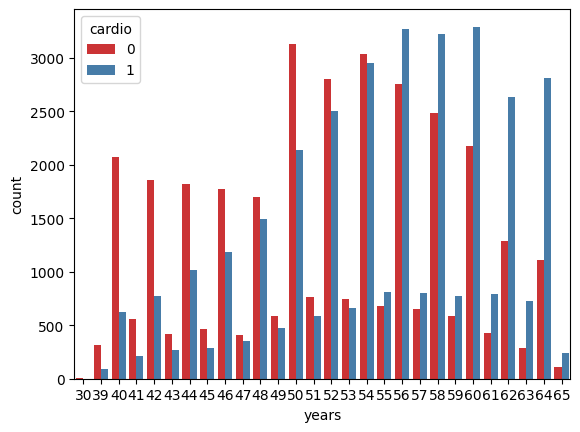

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
df['years'] = (df['age'] / 365).round().astype('int')
sns.countplot(x='years', 
              hue='cardio', 
              data = df, 
              palette="Set1",
              stat="count");

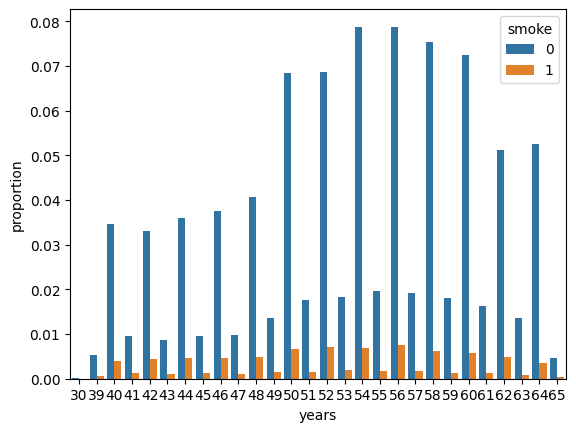

In [33]:
sns.countplot(x='years', 
              hue='smoke', 
              data = df, 
              palette="tab10",
              stat="proportion");

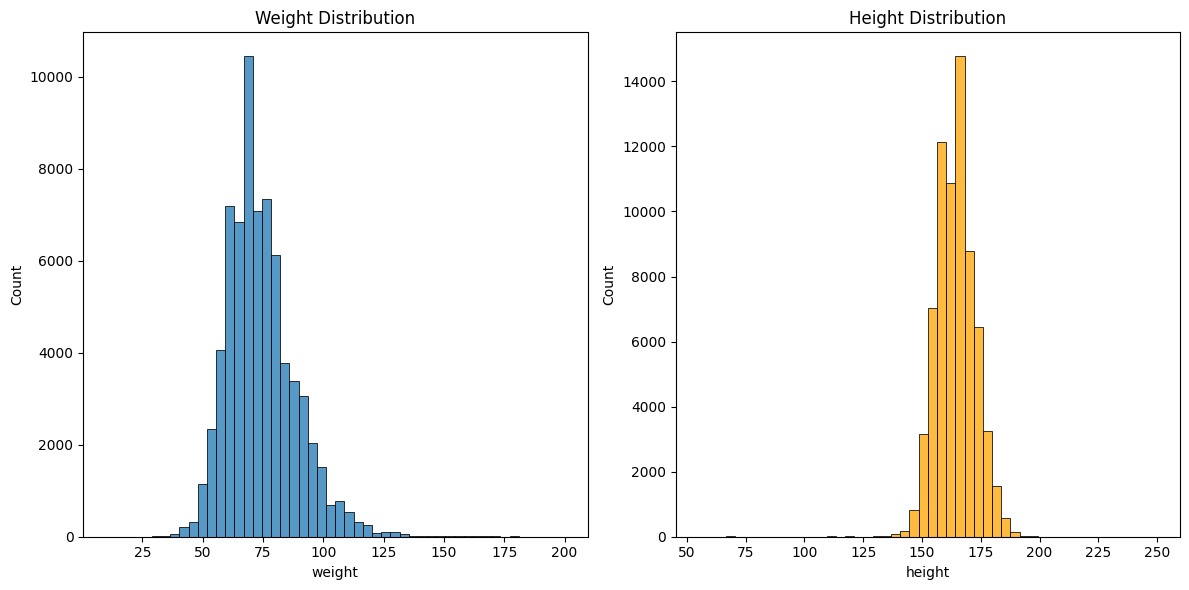

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the histogram of weight on the first subplot
sns.histplot(data=df, x="weight", bins=50, ax=axs[0])
axs[0].set_title('Weight Distribution')

# Plot the histogram of height on the second subplot
sns.histplot(data=df, x="height", bins=50, ax=axs[1], color='orange')
axs[1].set_title('Height Distribution')

# Show the plot
plt.tight_layout()
plt.show()


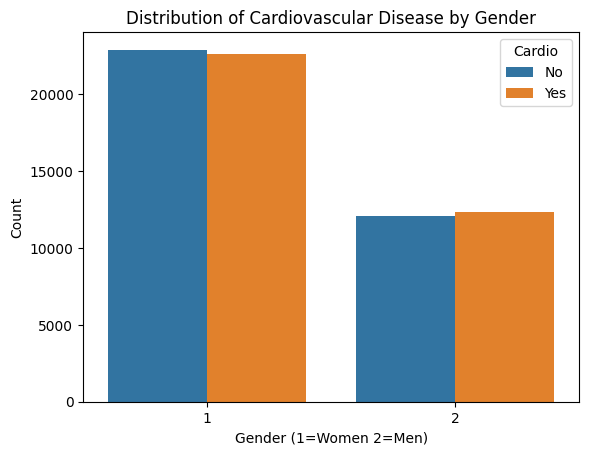

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a countplot
sns.countplot(data=df, x='gender', hue='cardio')

# Add labels and title
plt.xlabel('Gender (1=Women 2=Men)')
plt.ylabel('Count')
plt.title('Distribution of Cardiovascular Disease by Gender')

# Add legend
plt.legend(title='Cardio', labels=['No', 'Yes'])

# Show the plot
plt.show()


In [40]:
df["gender"].value_counts()

gender
1    45530
2    24470
Name: count, dtype: int64